Imported Dependencies for Analysis

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the csv file and show top 5 records from it

In [3]:
df = pd.read_csv('/content/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Data Cleaning Before Analysis: Drop Nulls, Duplicates,etc. Did not drop useless columns.

In [4]:
#returns number of duplicate values in dataframe
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [6]:
#filled NaN values with float: 0.0
df.fillna(0.0,inplace=True)
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


The symbol "EUR" is the abbreviation for the euro and it is the second most traded currency in the world, after the U.S. dollar.

In [7]:
#renaming columns
df.rename(columns={'dob': 'date_of_birth',
                   'height_cm': 'height_centimeters',
                  'weight_kg': 'weight_ kilograms',
                  'value_eur': 'value_euros',
                  'wage_eur': 'wage_euros',
                  'release_clause_eur': 'release_clause_euros'},
                  inplace=True, errors='raise')

The rest of column names are fine, just soccer terminology.

Save cleaned Dataset to csv file

In [8]:
df.to_csv('soccer_data_cleaned.csv')

How you would be able to see each column's name.

In [9]:
#returns all columns as a list
lists = df.columns.to_list()
lists

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'date_of_birth',
 'height_centimeters',
 'weight_ kilograms',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_euros',
 'wage_euros',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_euros',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 

Need to show number of rows and columns of this dataset.


In [10]:
print("Number of Columns in Dataset: ", len(df.columns))
print("Number of Rows in Dataset: ", len(df.index))

Number of Columns in Dataset:  104
Number of Rows in Dataset:  18278


Show number of players and their countries.
Number of Players Per Country

Top ten Countries with Largest Number of Players

In [11]:
numplayers_per_country = df.groupby('nationality').count()[['sofifa_id']]
numplayers_per_country['sofifa_id'].nlargest(n=10)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: sofifa_id, dtype: int64

bar plot of top 5 countries and their number of
players

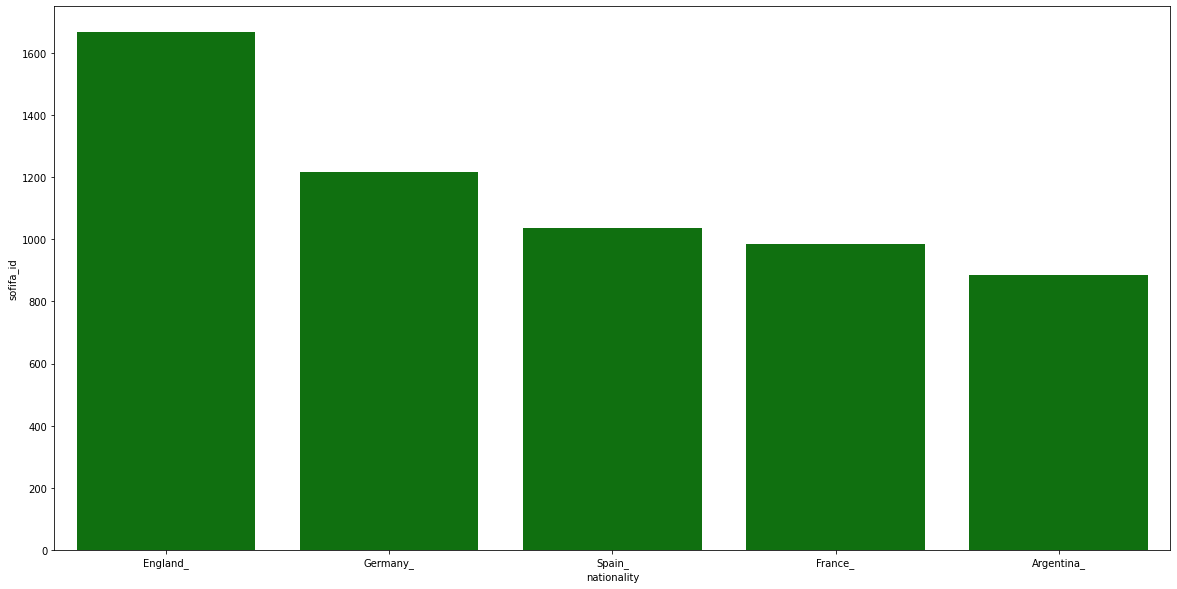

In [12]:
#turned 
numplayers_per_country_top_5 = numplayers_per_country['sofifa_id'].nlargest(n=5).add_suffix('_').reset_index()
x = numplayers_per_country_top_5['nationality']
y = numplayers_per_country_top_5['sofifa_id']
plt.figure(figsize=(20,10))
sns.barplot(x = x, y = y, data = numplayers_per_country_top_5, color='green')

Show top 5 players short name and wages.

In [13]:
df[['short_name', 'wage_euros']].nlargest(5, 'wage_euros')

,short_name,wage_euros
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


In [14]:
df[['short_name', 'wage_euros']].head()

,short_name,wage_euros
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


Show top 5 players short name and wages that are getting highest salaries.

In [15]:
df[['short_name', 'wage_euros']].nlargest(5, 'wage_euros')

,short_name,wage_euros
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


Create a bar plot of point number 8. No sure what is meant by point number 8.

Show top 10 records of Germany.

In [16]:
top_ten_germany = df[df['nationality'] == 'Germany']
top_ten_germany.head(10)

,sofifa_id,player_url,short_name,long_name,age,date_of_birth,height_centimeters,weight_ kilograms,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
109,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


Now show top 5 records of Germany players who have maximum height,
weight and wages. Got a little confused by this requirment.

In [17]:
df[df['nationality'] == 'Germany'].sort_values(['height_centimeters', 'weight_ kilograms', 'wage_euros'], ascending=False)[['short_name', 'height_centimeters', 'weight_ kilograms', 'wage_euros']].head(5)

,short_name,height_centimeters,weight_ kilograms,wage_euros
8016,A. Seydel,199,90,9000
1389,L. Unnerstall,198,103,14000
1217,M. Esser,198,97,23000
13576,L. Watkowiak,197,103,2000
518,R. Fährmann,197,98,43000


In [18]:
df.loc[df['nationality'] == 'Germany'][['short_name', 'height_centimeters', 'weight_ kilograms', 'wage_euros']].nlargest(5, ['height_centimeters', 'weight_ kilograms', 'wage_euros'])

,short_name,height_centimeters,weight_ kilograms,wage_euros
8016,A. Seydel,199,90,9000
1389,L. Unnerstall,198,103,14000
1217,M. Esser,198,97,23000
13576,L. Watkowiak,197,103,2000
518,R. Fährmann,197,98,43000


Show top 5 players short name and wages that are getting highest salaries.

In [19]:
df[['short_name', 'wage_euros', 'nationality']].nlargest(5, 'wage_euros')

,short_name,wage_euros,nationality
0,L. Messi,565000,Argentina
4,E. Hazard,470000,Belgium
1,Cristiano Ronaldo,405000,Portugal
5,K. De Bruyne,370000,Belgium
22,A. Griezmann,370000,France


.Show top 5 players who have great shooting skills among all with short name.

In [20]:
df[['short_name', 'shooting']].nlargest(5, 'shooting')

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
19,L. Suárez,89.0


Show top 5 players records (short name, defending, nationality, and club) that
have awesome defending skills.

In [21]:
df[['short_name', 'defending', 'nationality','club']].nlargest(5, 'defending')

,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


.Show wages records of top 5 players of 'Real Madrid' team.


In [22]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'wage_euros', 'club']].nlargest(5, 'wage_euros')

,short_name,wage_euros,club
4,E. Hazard,470000,Real Madrid
8,L. Modrić,340000,Real Madrid
36,T. Kroos,330000,Real Madrid
18,Sergio Ramos,300000,Real Madrid
46,K. Benzema,285000,Real Madrid


In [23]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'wage_euros', 'club']].head(5)

,short_name,wage_euros,club
4,E. Hazard,470000,Real Madrid
8,L. Modrić,340000,Real Madrid
18,Sergio Ramos,300000,Real Madrid
28,T. Courtois,235000,Real Madrid
36,T. Kroos,330000,Real Madrid


Show shooting records of top 5 players of 'Real Madrid' team.

In [24]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'shooting', 'club']].nlargest(5, 'shooting')

,short_name,shooting,club
100,G. Bale,87.0,Real Madrid
106,J. Rodríguez,86.0,Real Madrid
4,E. Hazard,83.0,Real Madrid
46,K. Benzema,82.0,Real Madrid
161,L. Jović,82.0,Real Madrid


In [25]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'shooting', 'club']].head(5)

,short_name,shooting,club
4,E. Hazard,83.0,Real Madrid
8,L. Modrić,76.0,Real Madrid
18,Sergio Ramos,68.0,Real Madrid
28,T. Courtois,0.0,Real Madrid
36,T. Kroos,80.0,Real Madrid


Show defending records of top 5 players of 'Real Madrid' team.

In [26]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'defending', 'club']].nlargest(5, 'defending')

,short_name,defending,club
18,Sergio Ramos,87.0,Real Madrid
42,Casemiro,85.0,Real Madrid
76,R. Varane,85.0,Real Madrid
94,Carvajal,82.0,Real Madrid
277,Nacho Fernández,81.0,Real Madrid


In [27]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'defending', 'club']].head(5)

,short_name,defending,club
4,E. Hazard,35.0,Real Madrid
8,L. Modrić,72.0,Real Madrid
18,Sergio Ramos,87.0,Real Madrid
28,T. Courtois,0.0,Real Madrid
36,T. Kroos,70.0,Real Madrid


.Show nationality records of top 5 players of 'Real Madrid' team.


In [28]:
df.loc[df['club'] == 'Real Madrid'][['short_name', 'defending', 'shooting', 'wage_euros','club', 'nationality']].nlargest(5, ['defending', 'shooting', 'wage_euros'])

,short_name,defending,shooting,wage_euros,club,nationality
18,Sergio Ramos,87.0,68.0,300000,Real Madrid,Spain
42,Casemiro,85.0,72.0,240000,Real Madrid,Brazil
76,R. Varane,85.0,45.0,205000,Real Madrid,France
94,Carvajal,82.0,47.0,205000,Real Madrid,Spain
332,Éder Militão,81.0,50.0,105000,Real Madrid,Brazil


In [29]:
df.loc[df['club'] == 'Real Madrid']['nationality'].head()

4     Belgium
8     Croatia
18      Spain
28    Belgium
36    Germany
Name: nationality, dtype: object

Below will be any analysis that goes beyond basic requirements of the Project.

Correlation Analysis between each distribution in the data set.

In [30]:
df.corr()

,sofifa_id,age,height_centimeters,weight_ kilograms,overall,potential,value_euros,wage_euros,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,...,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,...,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_centimeters,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,...,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_ kilograms,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,...,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,...,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goalkeeping_diving,-0.113073,0.110313,0.367433,0.342329,-0.013239,-0.049662,-0.022094,-0.023629,0.006039,-0.232714,...,-0.624495,-0.414361,-0.544390,-0.533440,-0.512461,1.000000,0.971330,0.967057,0.971218,0.973922
goalkeeping_handling,-0.116270,0.112929,0.367163,0.343211,-0.013716,-0.050859,-0.022119,-0.023590,0.005962,-0.232357,...,-0.623164,-0.413082,-0.545373,-0.534141,-0.513340,0.971330,1.000000,0.966508,0.970517,0.971244
goalkeeping_kicking,-0.114658,0.112615,0.364992,0.339805,-0.017393,-0.056216,-0.023048,-0.024679,0.004454,-0.228380,...,-0.619899,-0.411327,-0.542991,-0.533623,-0.512314,0.967057,0.966508,1.000000,0.966061,0.967866
goalkeeping_positioning,-0.123064,0.121381,0.367097,0.344397,-0.006408,-0.049007,-0.020554,-0.022428,0.008561,-0.230529,...,-0.621893,-0.406664,-0.540967,-0.530873,-0.509761,0.971218,0.970517,0.966061,1.000000,0.971060


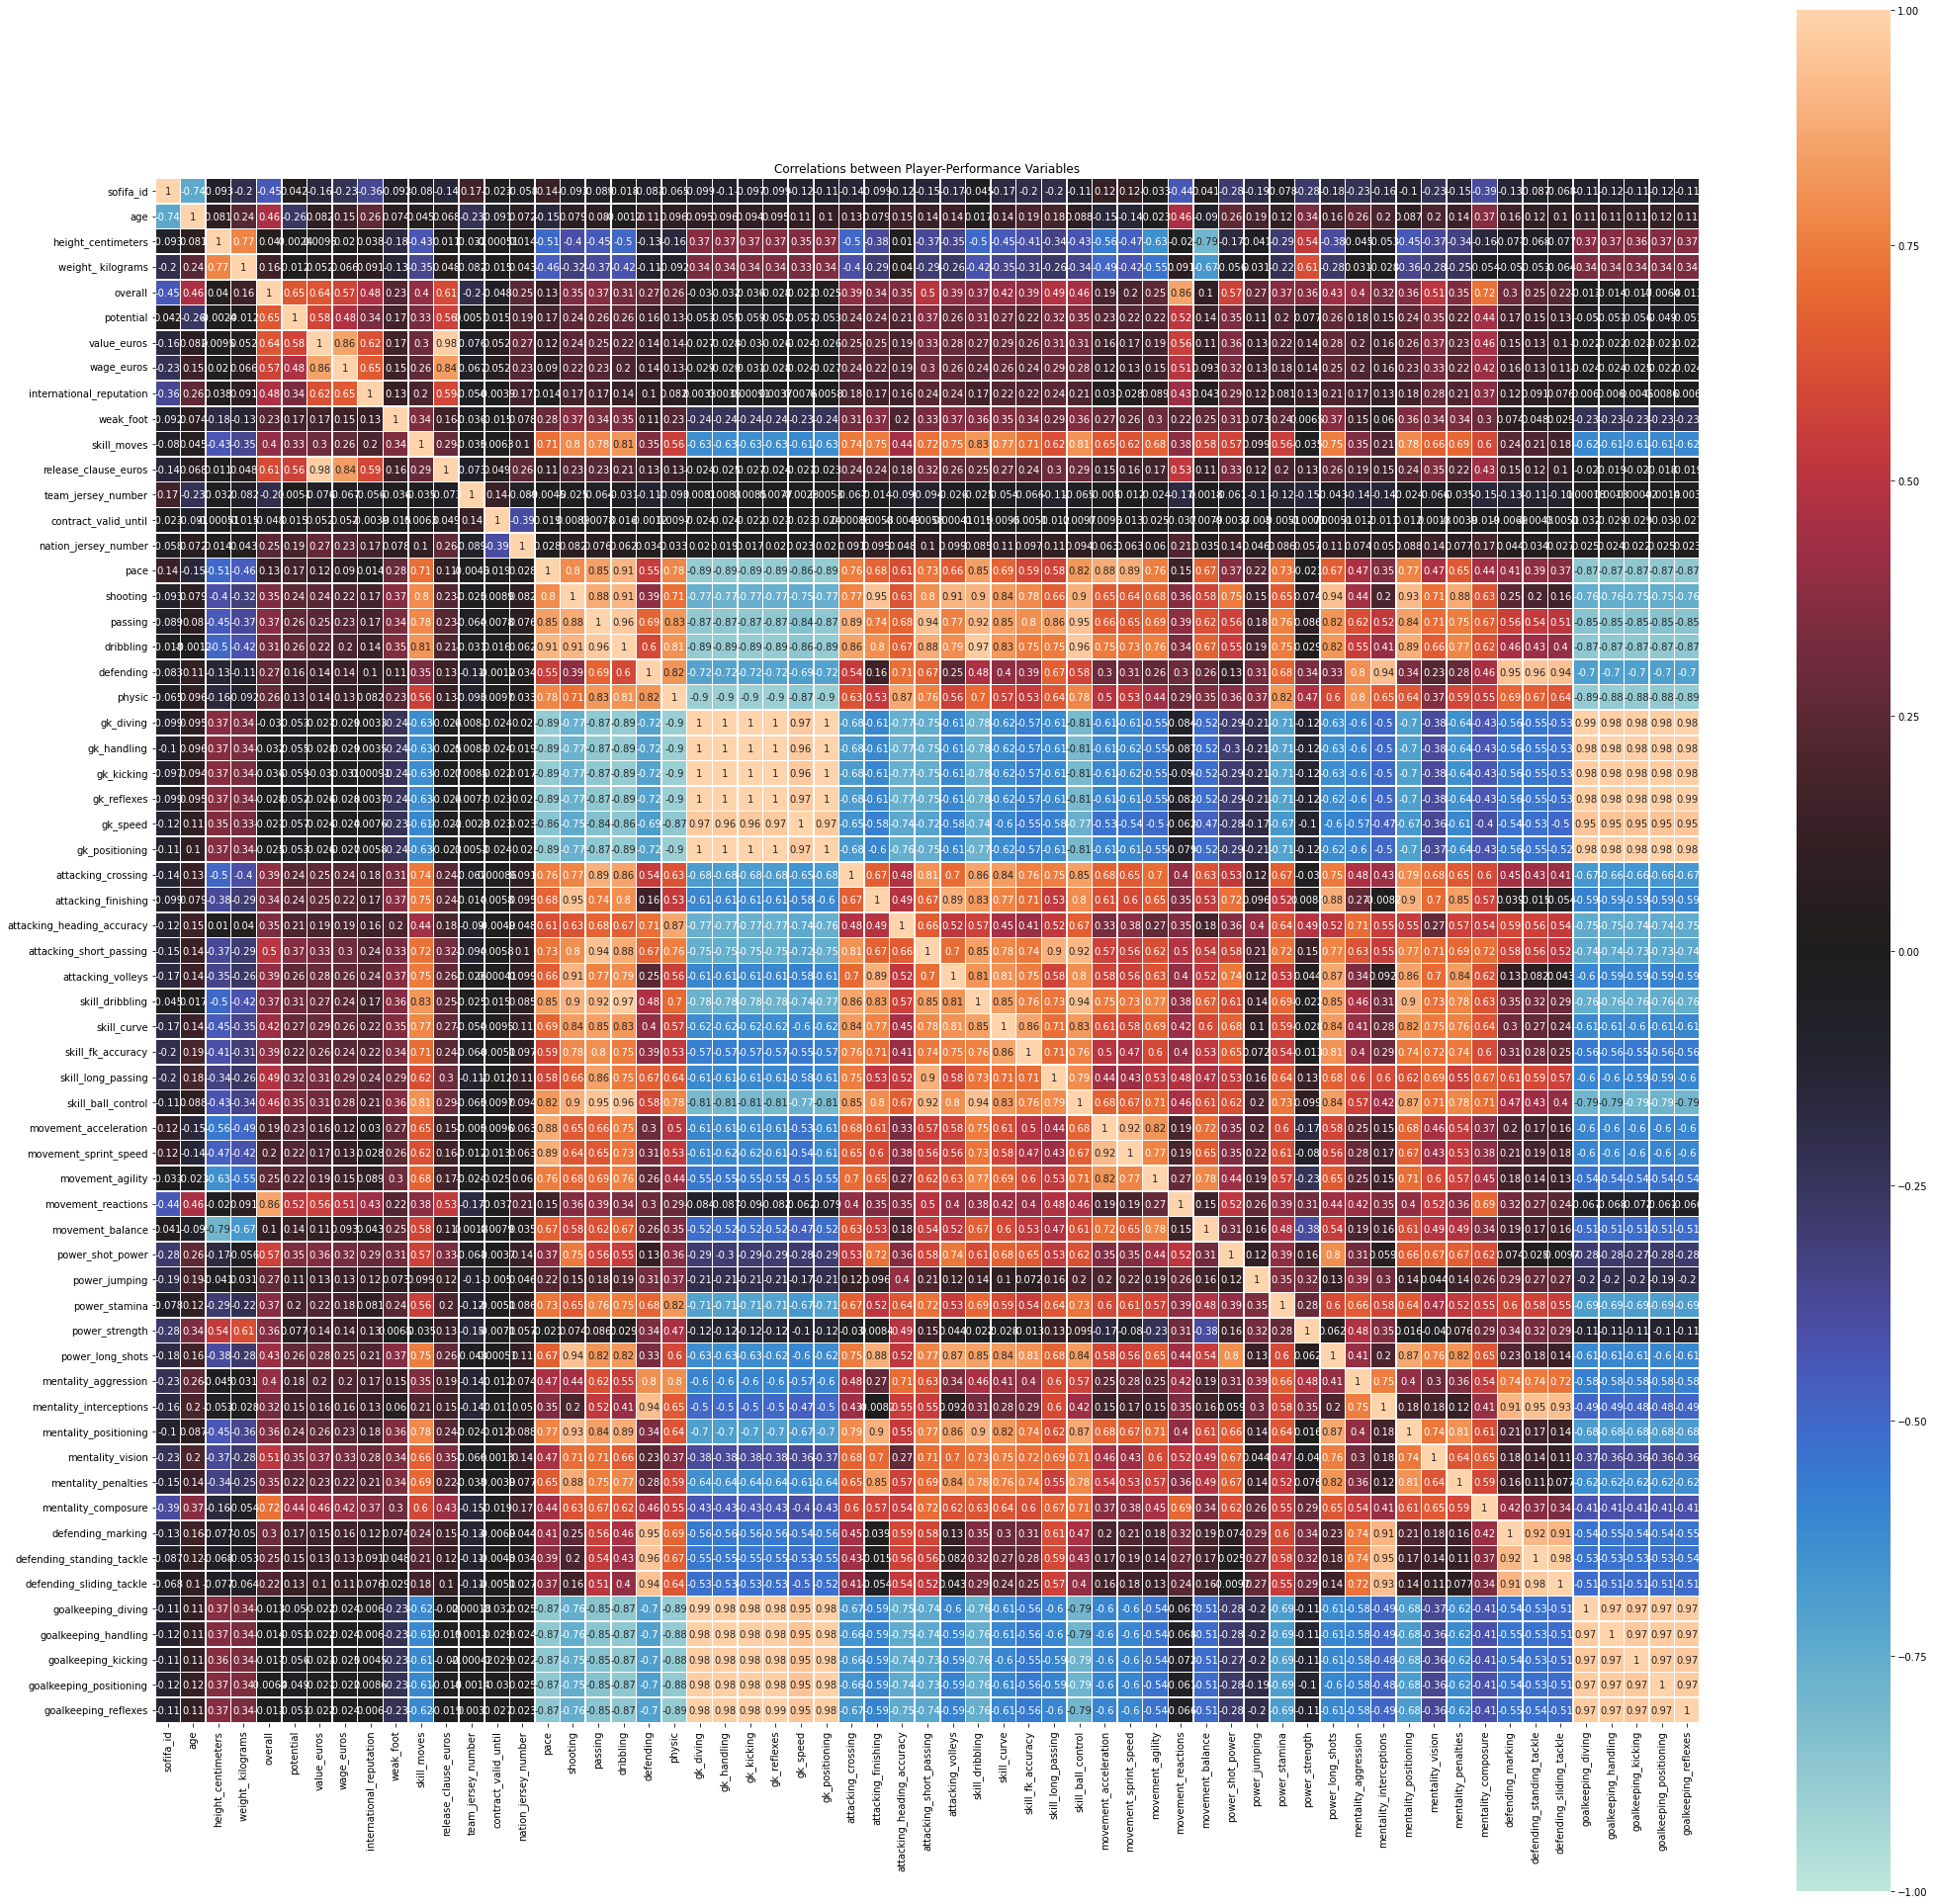

In [31]:
plt.figure(figsize=(35,35))
heat_map = sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0,
linewidth=.5,square=True, annot = True)
plt.title('Correlations between Player-Performance Variables')
plt.show()

Most of the players in this data are between the ages of 13-40 years of age. None are over 50 or under 12. Highest majority are in their 20s.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


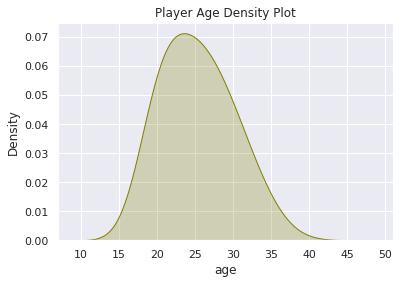

In [32]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.title('Player Age Density Plot')
# Large bandwidth
sns.kdeplot(df['age'], shade=True, bw=0.5, color="olive")
plt.show()

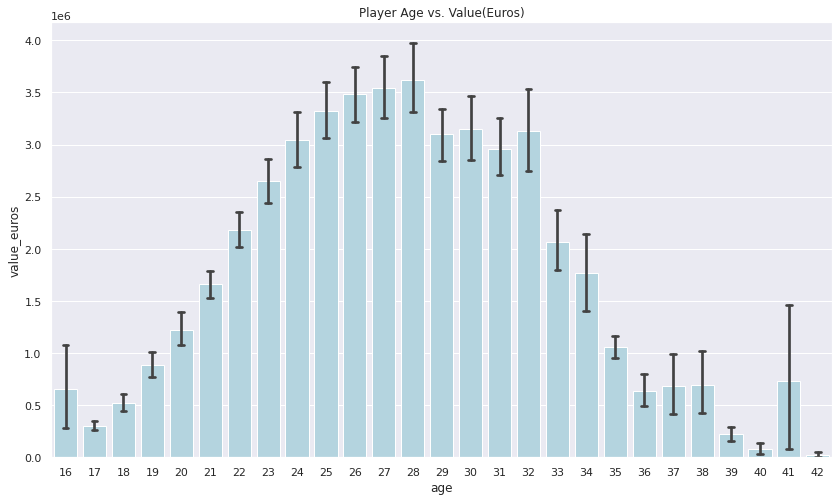

In [36]:
# create variables for data
x = df['age']
y = df['value_euros']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='lightblue').set(title="Player Age vs. Value(Euros)")

Age has no real affect on percieved potential. 

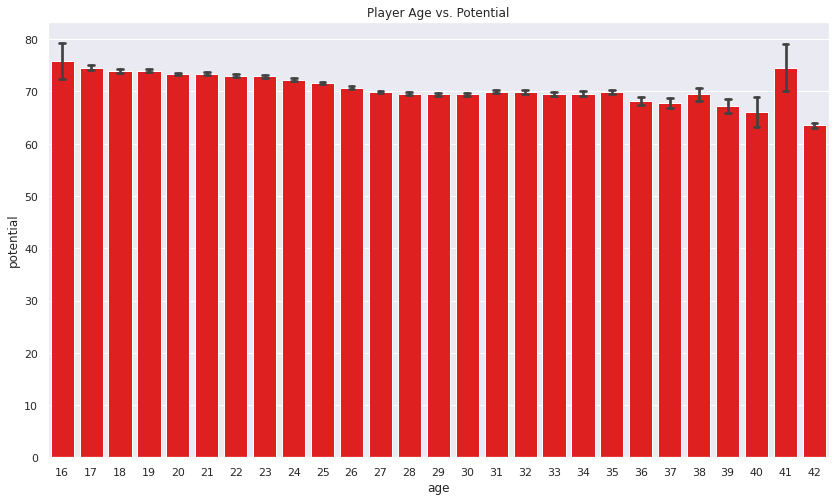

In [39]:
# create variables for data
x = df['age']
y = df['potential']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='red').set(title="Player Age vs. Potential")

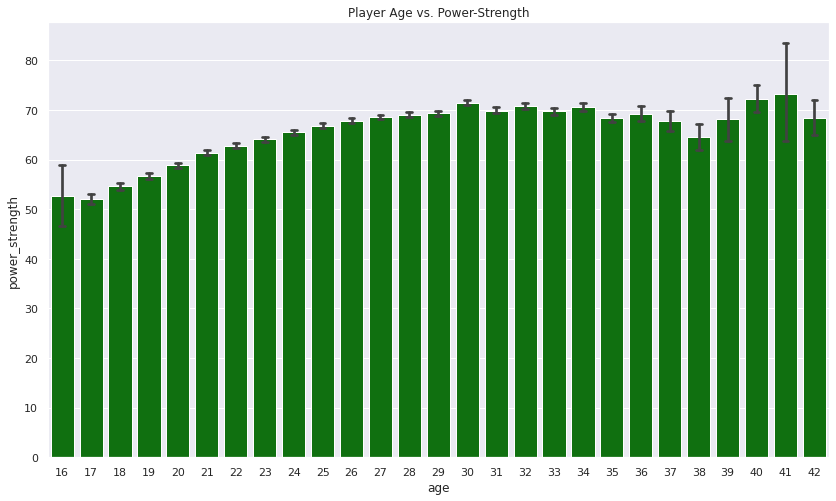

In [46]:
# create variables for data
x = df['age']
y = df['power_strength']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='green').set(title="Player Age vs. Power-Strength")

A players drippling skill starts to lessen once they reach age 36.

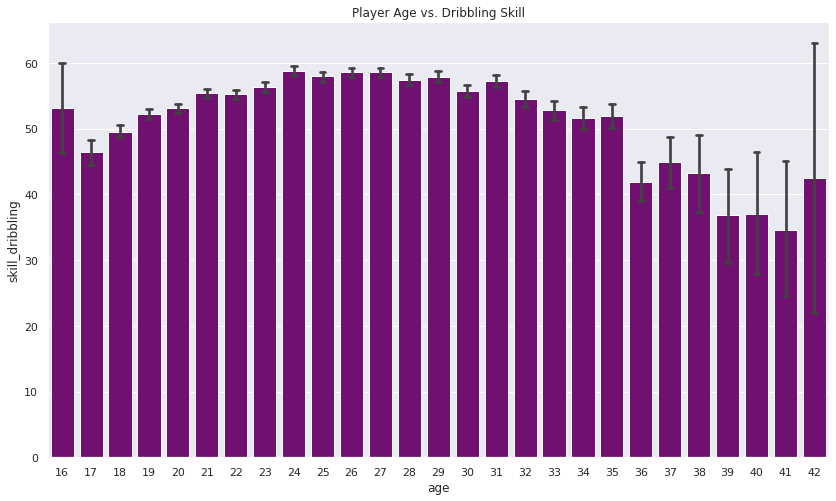

In [47]:
# create variables for data
x = df['age']
y = df['skill_dribbling']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='purple').set(title="Player Age vs. Dribbling Skill")

A player in there 20-29 age range is in the best shape. Age start to decline by 36 and over.

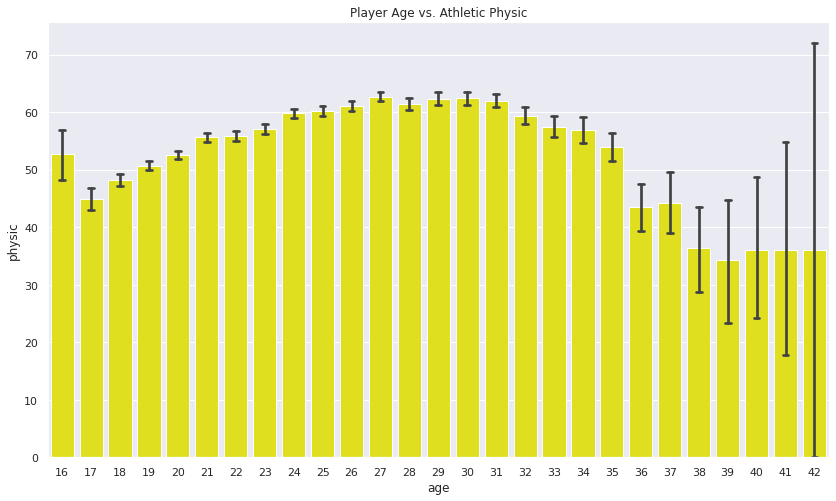

In [50]:
# create variables for data
x = df['age']
y = df['physic']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='yellow').set(title="Player Age vs. Athletic Physic")

The higher your percieved potential, more your worth.

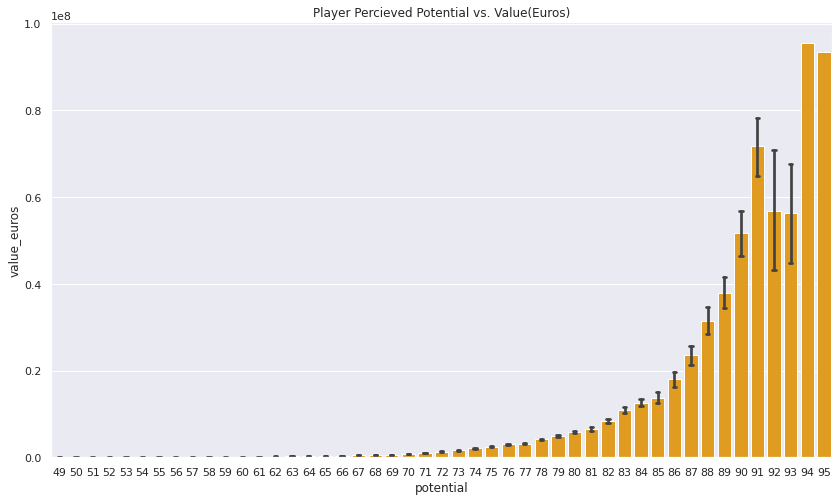

In [58]:
# create variables for data
x = df['potential']
y = df['value_euros']


# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='orange').set(title="Player Percieved Potential vs. Value(Euros)")

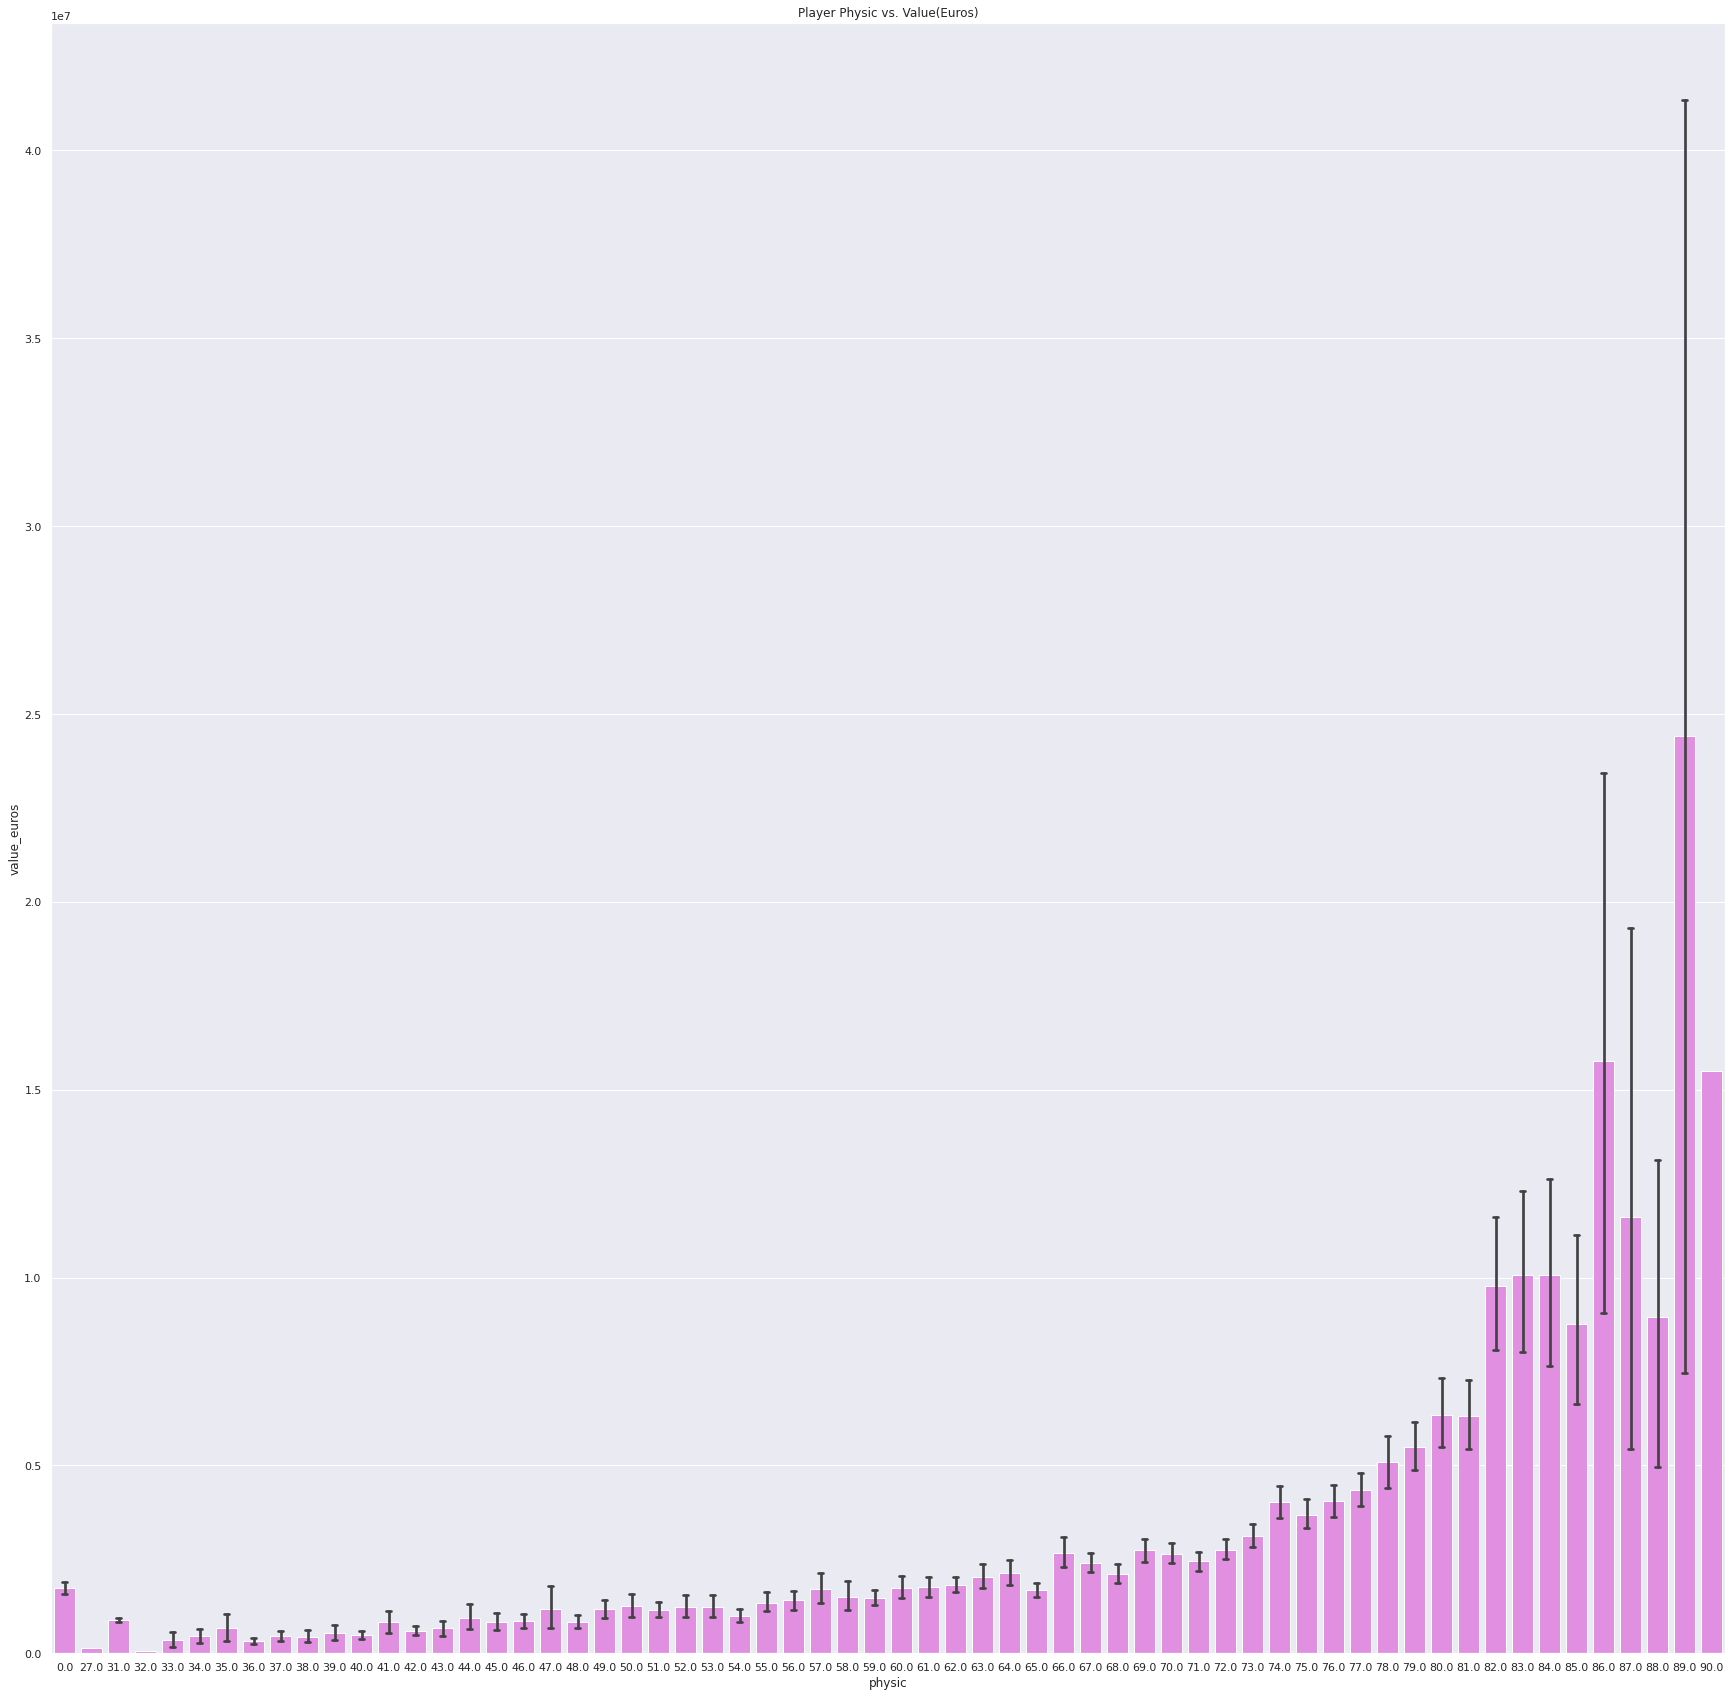

In [62]:
# create variables for data
x = df['physic']
y = df['value_euros']


# Set the figure size
plt.figure(figsize=(30, 30))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='violet').set(title="Player Physic vs. Value(Euros)")

The higher your value higher the wage.

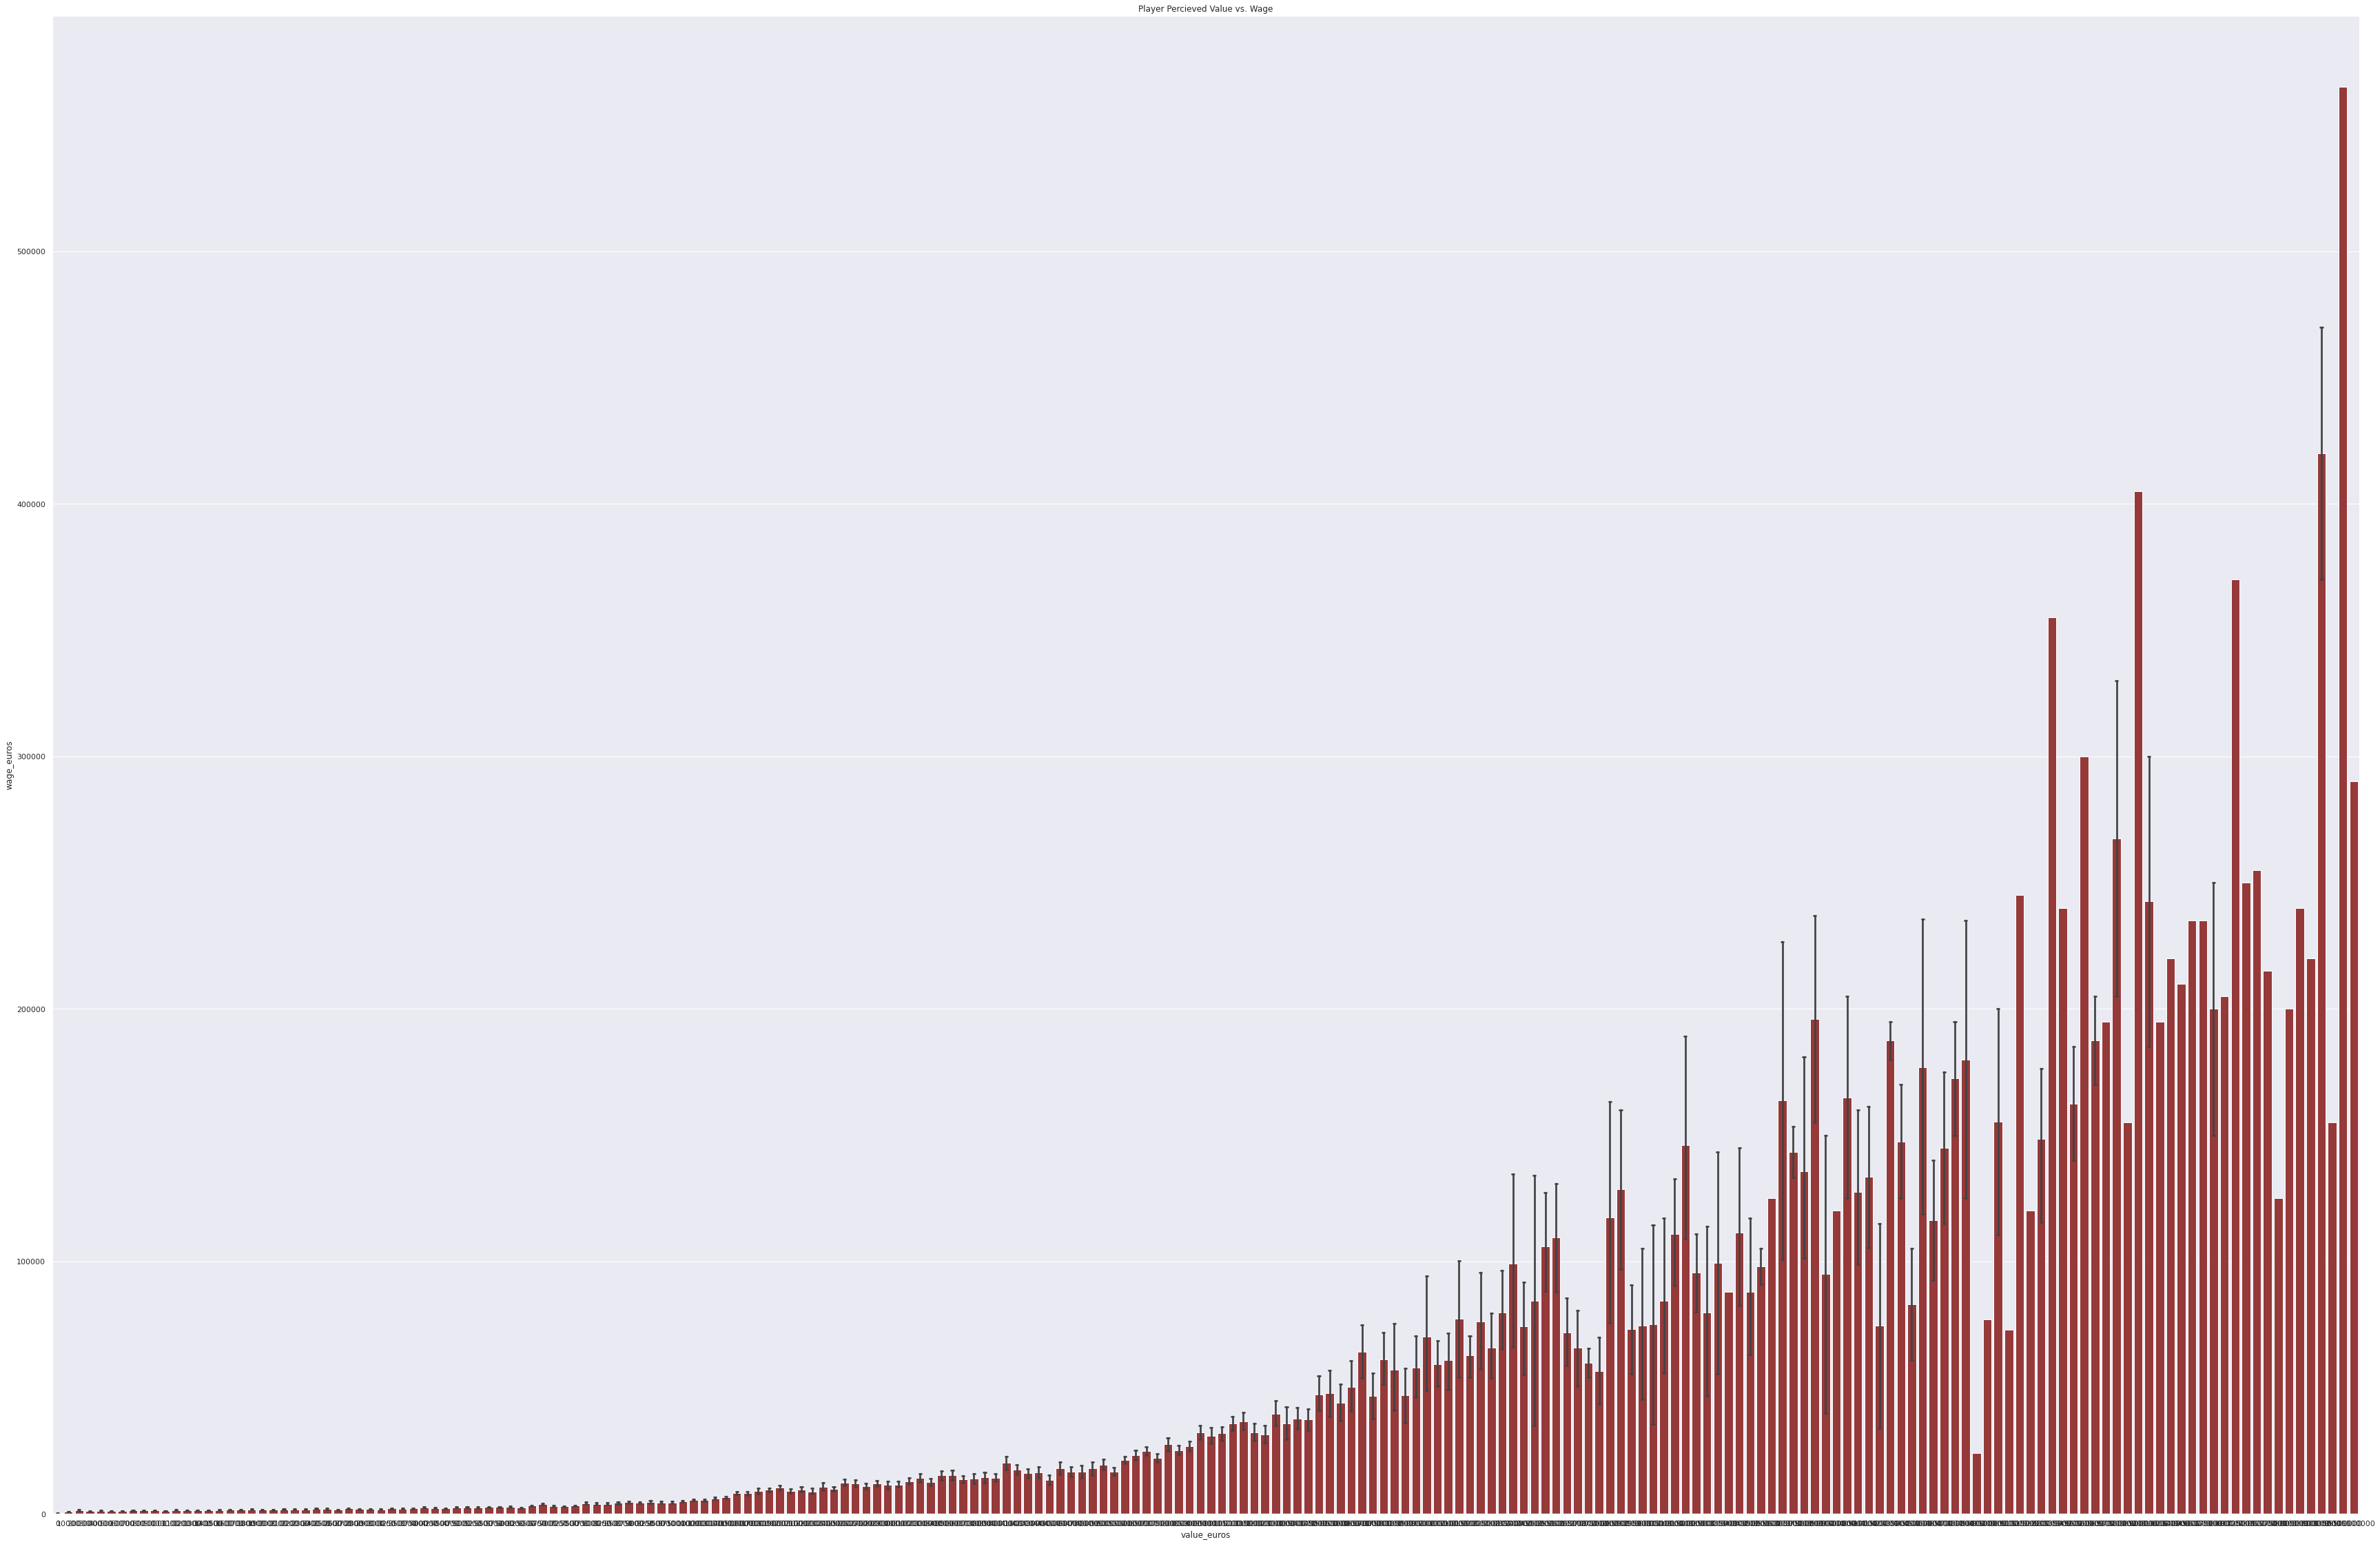

In [70]:
# create variables for data
x = df['value_euros']
y = df['wage_euros']


# Set the figure size
plt.figure(figsize=(60, 40))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='brown').set(title="Player Percieved Value vs. Wage")

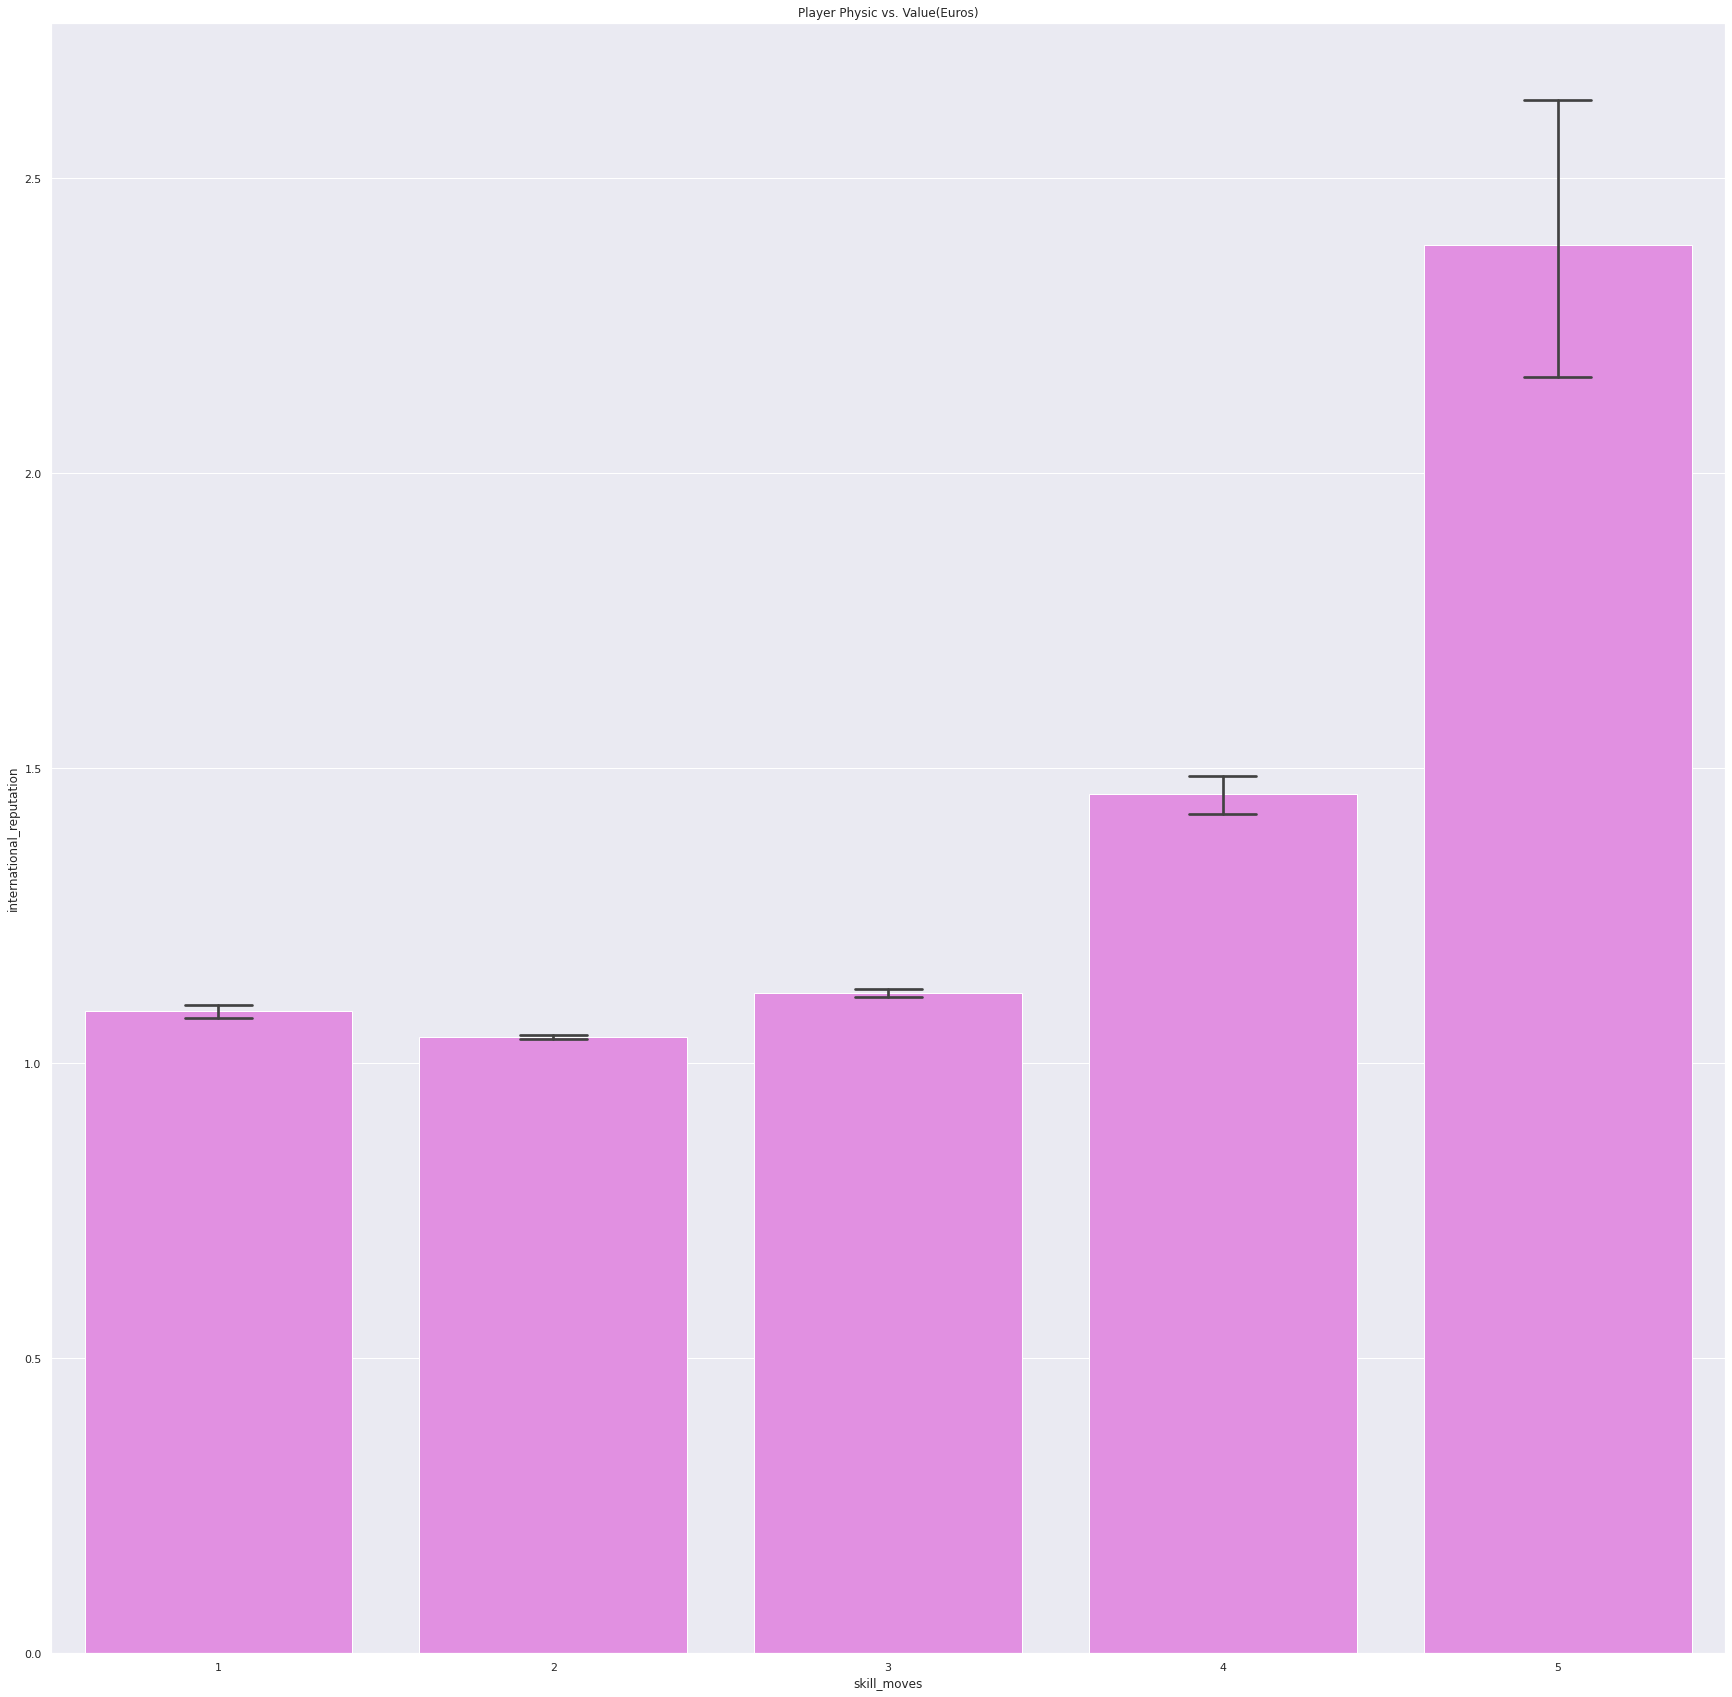

In [71]:
# create variables for data
x = df['skill_moves']
y = df['international_reputation']


# Set the figure size
plt.figure(figsize=(30, 30))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='violet').set(title="Player Skills vs. International Reputation")

The more movement and reactions on the field, the higher the reputation in the international community of Soccer.

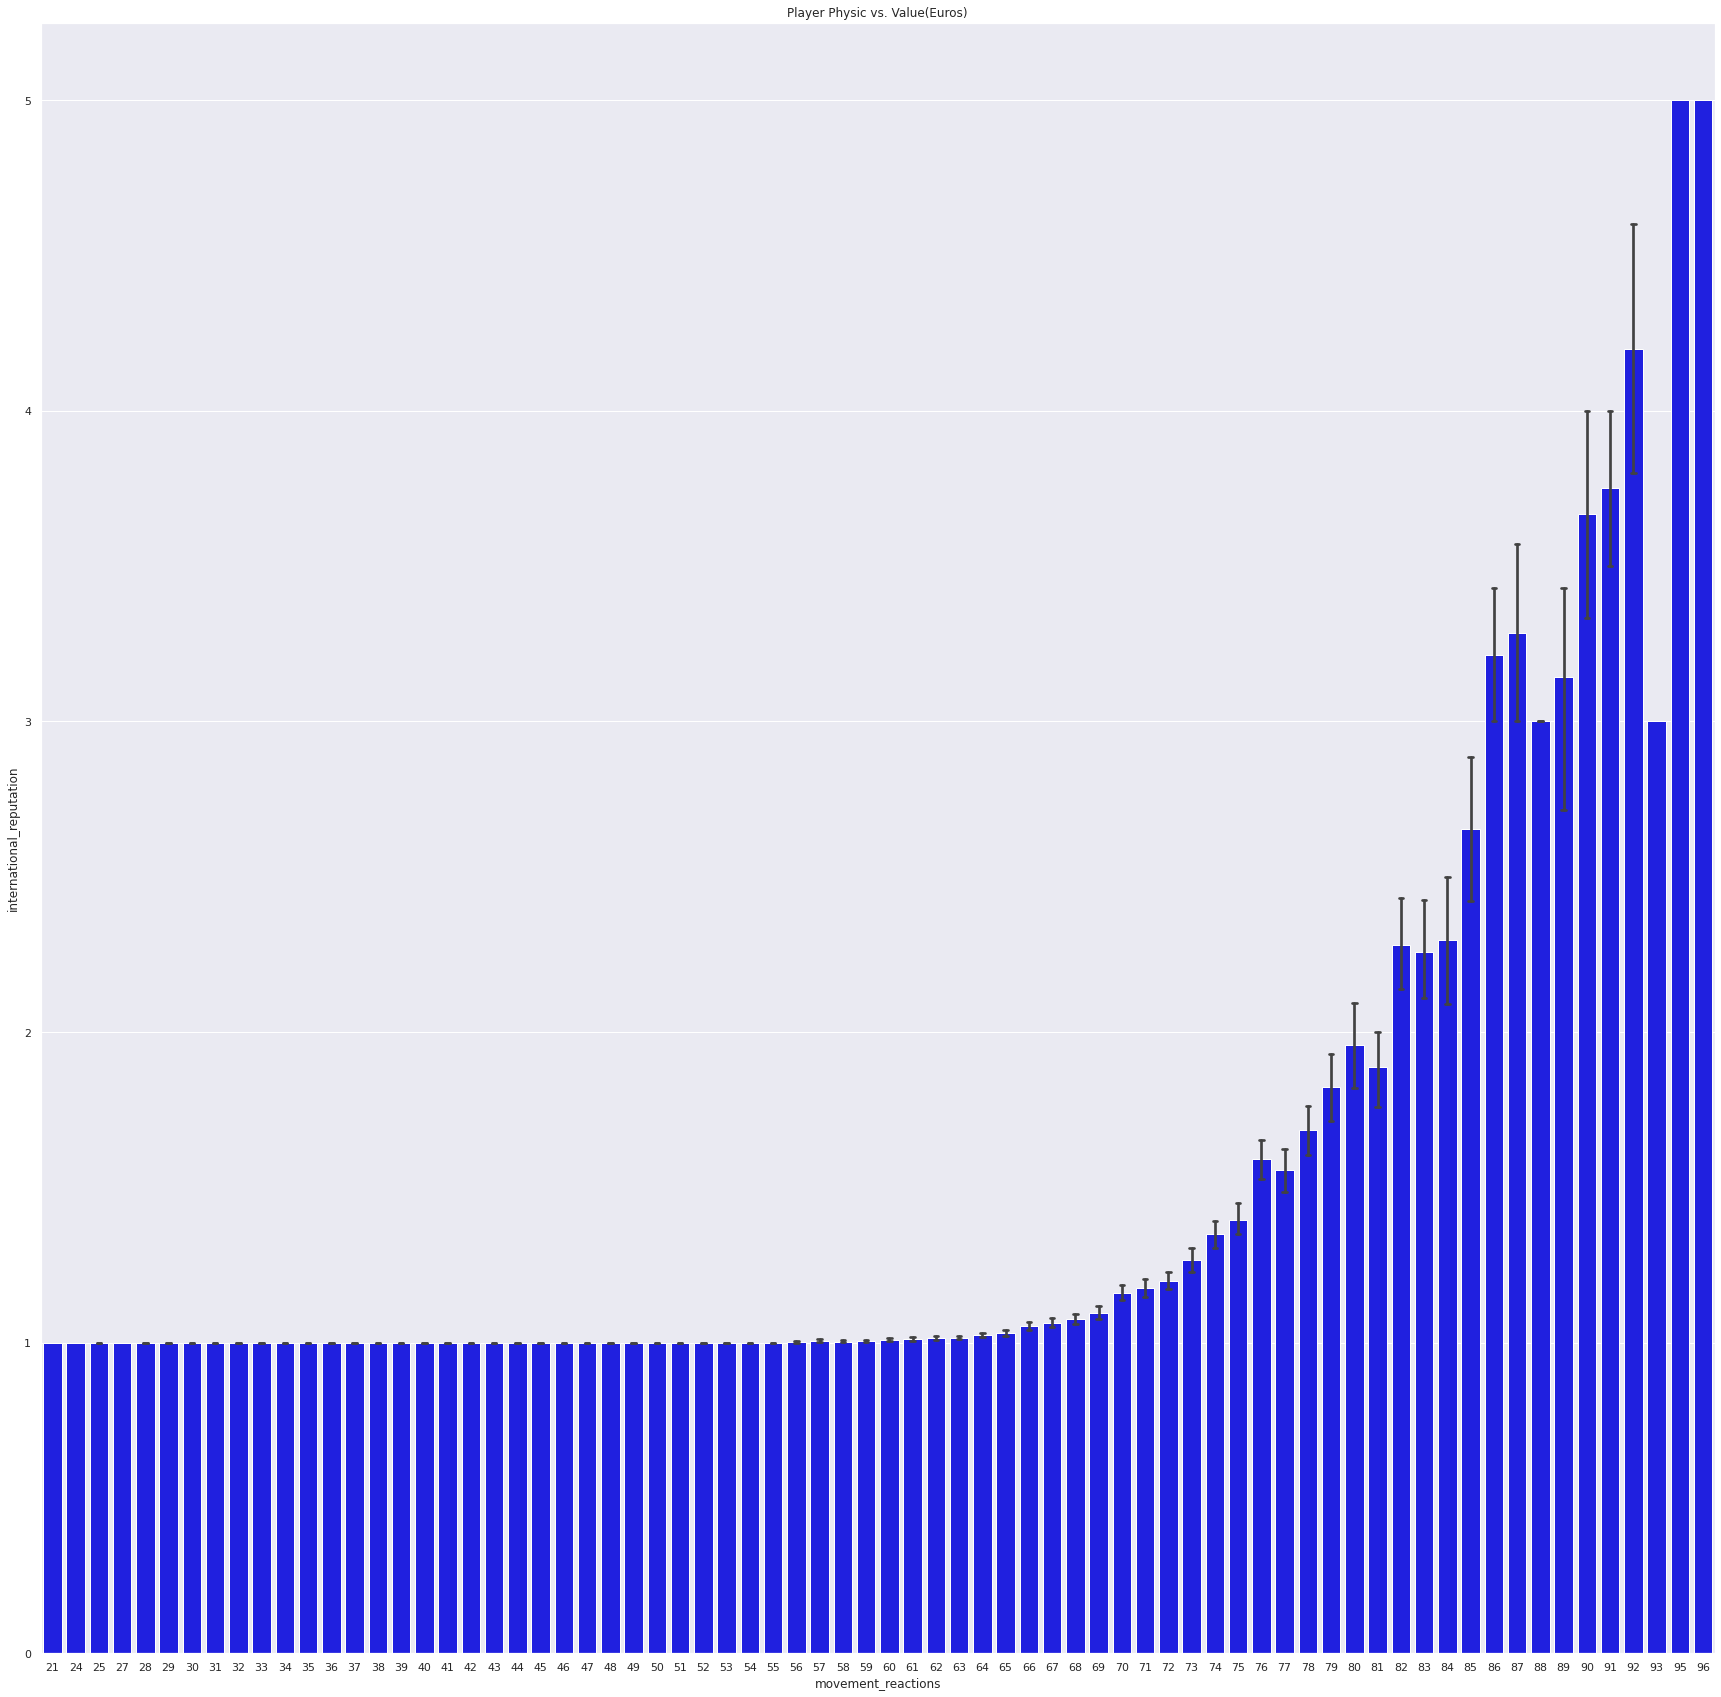

In [73]:
# create variables for data
x = df['movement_reactions']
y = df['international_reputation']


# Set the figure size
plt.figure(figsize=(30, 30))

# plot a bar chart
ax = sns.barplot(x=x, y=y, data=df, estimator=np.mean, ci=85, capsize=.2, color='blue').set(title="Player Physic vs. Value(Euros)")